# <strong>爬取網站

In [1]:
import requests
from bs4 import BeautifulSoup
headers = {'user_agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.87 Safari/537.36 Edg/80.0.361.48'}
cookies = {'over18': '1'}
url = 'https://www.ptt.cc/bbs/Gossiping/index.html'

res = requests.get(url, headers=headers, cookies=cookies)
res.encoding = 'utf-8'
soup = BeautifulSoup(res.text, 'html.parser')

# <strong>解析網站HTML

In [2]:
datas = []
# 爬取前五頁
for i in range(5): 
    for article in soup.find_all('div', class_='r-ent'):
        try:
            info = {}
            info['Title'] = article.find('div', class_='title').text
            info['Author'] = article.find('div', class_='author').text
            url = 'https://www.ptt.cc/' + article.find('a')['href']
            info['Url'] = url
            soup2 = BeautifulSoup(requests.get(url, headers=headers, cookies=cookies).text, 'html.parser')
            main_content = soup2.find('div', id='main-content')
            info['Pub_time'] = main_content.find_all('span', class_='article-meta-value')[3].text
            for i in main_content.find_all('span', class_='f2'):
                if '來自' in str(i):
                    info['Author_ip'] = str(i).split(u'來自: ')[1].split(' (')[0]
            info['Content'] = main_content.text.split('2020')[1].split(u'發信站')[0].strip()
            datas.append(info)
        except:
            pass
    url = 'https://www.ptt.cc/' + soup.find('div', class_='btn-group btn-group-paging').find_all('a')[1]['href']
    res = requests.get(url, headers=headers, cookies=cookies)
    res.encoding = 'utf-8'
    soup = BeautifulSoup(res.text, 'html.parser')


# <strong>輸出成DataFrame格式

In [3]:
import pandas as pd

df = pd.DataFrame(datas, columns=['Author', 'Author_ip', 'Pub_time', 'Url', 'Title', 'Content'])
df.set_index("Author" , inplace=True)
df.head(10)

,Author_ip,Pub_time,Url,Title,Content
Author,,,,,
sos007sos,223.140.149.212,Thu Feb 13 15:32:14 2020,https://www.ptt.cc//bbs/Gossiping/M.1581579136...,\n[問卦] 購物金&折價券？\n,是這樣啦\n\n10多年前購物網站\n\n為了刺激業績\n\n給我3600購物金（可抵100...
kimiya1,114.34.118.184,Thu Feb 13 15:32:34 2020,https://www.ptt.cc//bbs/Gossiping/M.1581579157...,\nRe: [新聞] 工廠暗夜偷賣口罩遭稽查 民眾幫叫屈\n,未徵收工廠口罩能對外販售？經濟部：盡量不要\nhttps://news.ebc.net.tw...
poeta,111.252.1.218,Thu Feb 13 15:35:06 2020,https://www.ptt.cc//bbs/Gossiping/M.1581579308...,\n[問卦] 二手的健身環 會不會有衛生的問題\n,想買死未取的健身大冒險\n\nfb社團上有一個人私我 說只用一次要賣我\n\n我看他的大頭照...
hk5566,61.223.118.79,Thu Feb 13 15:35:13 2020,https://www.ptt.cc//bbs/Gossiping/M.1581579315...,\n[問卦] 看到寄生上流的富太太被揉奶時有興奮嗎\n,原本是用輕鬆又正經的心情，\n來欣賞這部黑色幽默驚悚片。\n\n就在關鍵緊張的屏息時刻，\n...
kaky,114.27.114.239,Thu Feb 13 15:35:51 2020,https://www.ptt.cc//bbs/Gossiping/M.1581579353...,\nRe: [新聞] 工廠暗夜偷賣口罩遭稽查 民眾幫叫屈\n,※ 引述《kimiya1 (888)》之銘言：\n: ※ 引述《komuroboy (How...
kinmenGD,210.59.241.79,Thu Feb 13 15:36:02 2020,https://www.ptt.cc//bbs/Gossiping/M.1581579364...,\nRe: [新聞] 抗疫發振興抵用券 經濟部：將以COUPON券\n,我猜會是用以下方式\n\n振興券分為 餐飲券500、零售券500、會展券500、商圈券500...
orinsinal,111.71.85.35,Thu Feb 13 15:36:09 2020,https://www.ptt.cc//bbs/Gossiping/M.1581579371...,\nRe: [新聞] 柯文哲講什麼都被罵 蔡壁如:黑柯產業鏈似乎已經啟動\n,有錯都別人黑你，怪東怪西就是不會檢討自己\n\n柯文哲不會有錯，有錯那是護航不力的錯\n\n...
mliao,58.247.233.37,Thu Feb 13 15:36:52 2020,https://www.ptt.cc//bbs/Gossiping/M.1581579414...,\n[問卦] 有一個叫Mike的德國網友約我朋友見面\n,我一個好基友最近失戀\n\n還被前女友的新歡編了一首歌嘲諷\n\n慘到不行\n\n他現在有個...
a04775,36.228.195.154,Thu Feb 13 15:37:13 2020,https://www.ptt.cc//bbs/Gossiping/M.1581579435...,\n[問卦] 發消費券和印鈔票發給大家差在哪裡？\n,如題\n\n小弟是理組啦\n\n發消費券讓大家都拿得到\n\n不就是增加市場上流通的貨幣量嗎...


# <strong>分群&排序

In [4]:
grouped = df.groupby('Author').count()
grouped.sort_values('Title', ascending=False).head(10)

,Author_ip,Pub_time,Url,Title,Content
Author,,,,,
kimiya1,4,4,4,4,4
arsonlolita,2,2,2,2,2
kaky,2,2,2,2,2
Rrrxddd,2,2,2,2,2
momo988,1,1,1,1,1
pasionlove,1,1,1,1,1
paca0713,1,1,1,1,1
orinsinal,1,1,1,1,1
oooo,1,1,1,1,1


# <strong>定義"移除停留字"方法

In [5]:
def remove_stop_words(file_name, seg):
    with open(file_name, 'r') as f:
        stop_words = f.readlines()
    stop_words = [stop_word.strip() for stop_word in stop_words]
    if seg not in stop_words:
        return True

# <strong>定義"計算詞彙出現次數"方法

In [6]:
def count_segment_freq(seg_list):
    seg_df = pd.DataFrame(seg_list, columns=['seg'])
    seg_df['count'] = 1
    sef_freq = seg_df.groupby('seg')['count'].sum().sort_values(ascending=False)
    sef_freq = pd.DataFrame(sef_freq)
    return sef_freq

# <strong>使用jieba斷詞，並利用wordcloud繪出文字雲

c:\python27\lib\site-packages\ipykernel_launcher.py:5: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  """


     count
seg       
購物       4
網站       4
？        3
業績       3
哪種       2
是        2
元        2
對        2
一樣       1
可抵       1


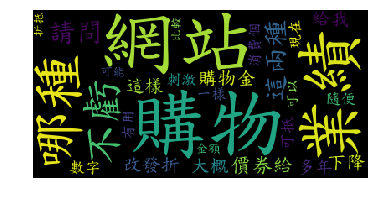

     count
seg       
，       10
徵收       6
/        5
工廠       4
製        4
的        4
家        4
造        4
口罩       3
經濟部      3


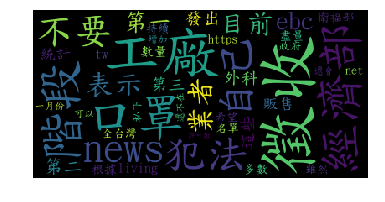

     count
seg       
我        3
的        3
有        2
上        2
黏        1
只用       1
想        1
怎麼辦      1
大頭照      1
大冒險      1


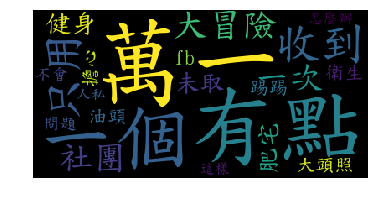

       count
seg         
.          9
/          9
的          4
i          3
jpg        3
imgur      3
https      3
com        3
:          3
？          3


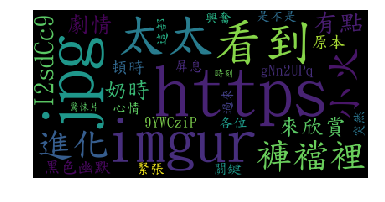

     count
seg       
，       14
:       13
的        6
口罩       6
物價       4
政府       4
在        4
、        4
※        3
間        3


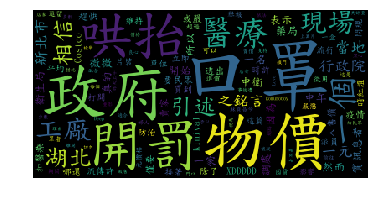

In [8]:
import jieba.analyse
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# 自定義詞典
jieba.load_userdict('word.txt')
# 設定字型
font_path = 'kaiu.ttf'  # 標楷體

for i in range(5):
    seg_list = []
    text = df['Content'][i]
    for seg in jieba.cut(text, cut_all=False):
        if remove_stop_words('stop_word.txt', seg) and seg.strip() not in ['\n', '']:
            seg_list.append(seg)
    print(count_segment_freq(seg_list).head(10))
    seg_list = ' '.join(seg_list)
    wc = WordCloud(background_color='black', font_path=font_path)
    wc.generate(seg_list)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()